In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# K Means Cluster

In [2]:
df = pd.DataFrame({"x1":[1,2,3,3.5,5.5,6,8,7,8],
                "x2":[1,5,2,4.2,4.4,6.5,2,5,7]})

In [3]:
df

,x1,x2
0,1.0,1.0
1,2.0,5.0
2,3.0,2.0
3,3.5,4.2
4,5.5,4.4
5,6.0,6.5
6,8.0,2.0
7,7.0,5.0
8,8.0,7.0


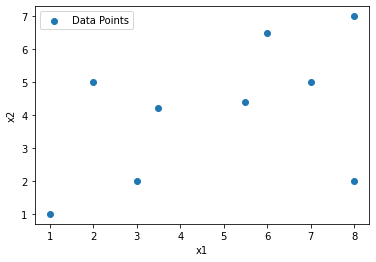

In [4]:
plt.scatter(df["x1"], df["x2"], label = "Data Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [5]:
x = df

In [6]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters = 2)

model.fit(x)

KMeans(n_clusters=2)

In [7]:
# get label 

model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
# get the centroids 

centroid = model.cluster_centers_

In [9]:
model.n_iter_

4

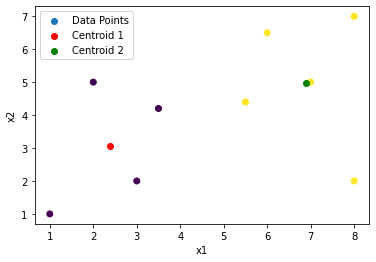

In [10]:
plt.scatter(df["x1"], df["x2"], c = model.labels_, label = "Data Points")
plt.scatter(centroid[0][0], centroid[0][1], color = 'r', label = "Centroid 1")
plt.scatter(centroid[1][0], centroid[1][1], color = 'g', label = "Centroid 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# K Means on Mall Dataset

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [12]:
df = pd.read_csv("Mall_Customers.csv", index_col = "CustomerID")
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [13]:
df["Genre"] = df["Genre"].map({"Female":0,"Male":1})

In [14]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [15]:
df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [16]:
df.describe()

,Genre,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Genre               200 non-null    int64
 1   Age                 200 non-null    int64
 2   Annual_Income_(k$)  200 non-null    int64
 3   Spending_Score      200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


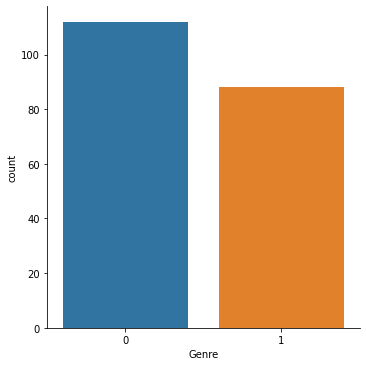

In [18]:
sns.catplot(data = df, x = "Genre", kind = "count")
plt.show()

<Figure size 1440x720 with 0 Axes>

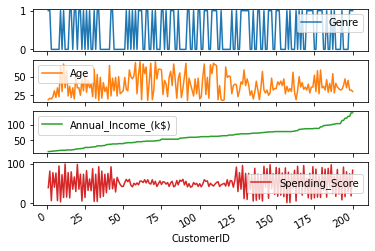

In [19]:
fig = plt.figure(figsize=(20,10))
df.plot(subplots = True)
plt.show()

<Figure size 1440x720 with 0 Axes>

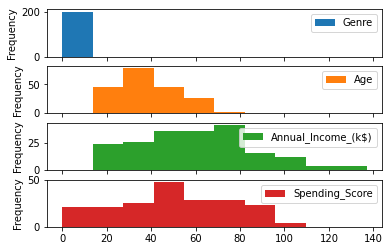

In [20]:
fig = plt.figure(figsize=(20,10))
df.plot(kind="hist",subplots=True)
plt.show()

In [21]:
x = df

In [22]:
#from sklearn.cluster import KMeans

## Scree Plot / Elbow Method

In [ ]:
from sklearn.cluster import KMeans

k = [1,2,3,4,5,6,7,8,9,10]
ssd = [] #sum_sq_distance
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(x)
    ssd.append(model.inertia_)

In [ ]:
plt.plot(k, ssd, marker = 'o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
model = KMeans(n_clusters = 6)
model.fit(x)

In [ ]:
model.labels_

In [ ]:
model.n_iter_

In [ ]:
model.cluster_centers_

In [ ]:
data = df 

data["Final Label"] = model.labels_
data

### Selecting only two features for model for visualization of Clusters

In [ ]:
X = df[["Annual_Income_(k$)","Spending_Score"]]
X.head()

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10]
ssd = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(X)
    ssd.append(model.inertia_)

In [ ]:
plt.plot(k, ssd, marker = 'o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

In [ ]:
model = KMeans(n_clusters = 5)
model.fit(X)

In [ ]:
model.cluster_centers_

In [ ]:
model.labels_

In [ ]:
model.n_iter_

In [ ]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])

In [ ]:
centroid = model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

### Cluster Visualization

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.scatter(df["Annual_Income_(k$)"], df["Spending_Score"], c = model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0], centroid[i][1], label = "centroid"+str(i+1))
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.legend()

# K Means on Iris Data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [3]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris["species"] = le.fit_transform(iris["species"])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


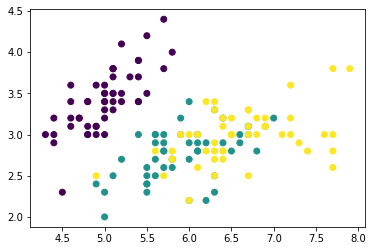

In [8]:
plt.scatter(iris["sepal_length"], iris["sepal_width"], c = iris["species"])
plt.show()

In [10]:
x = iris.drop(columns = ["species"])

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters = 3)

model.fit(x)

KMeans(n_clusters=3)

In [14]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
centroid = model.cluster_centers_

In [18]:
model.n_iter_

3

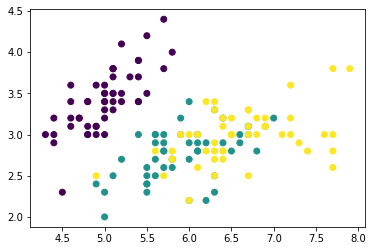

In [21]:
plt.scatter(iris["sepal_length"], iris["sepal_width"], c = iris["species"])
plt.show()

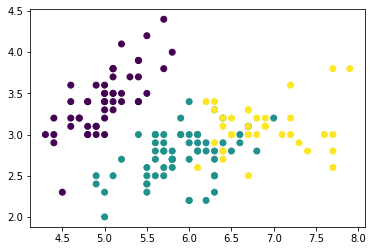

In [22]:
plt.scatter(iris["sepal_length"], iris["sepal_width"], c = model.labels_)
plt.show()

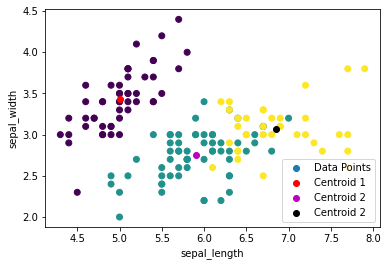

In [33]:
plt.scatter(iris["sepal_length"], iris["sepal_width"], c = model.labels_, label = "Data Points")
plt.scatter(centroid[0][0], centroid[0][1], color = 'r', label = "Centroid 1")
plt.scatter(centroid[1][0], centroid[1][1], color = 'm', label = "Centroid 2")
plt.scatter(centroid[2][0], centroid[2][1], color = 'k', label = "Centroid 2")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()